In [89]:
import numpy as np
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
from scipy.stats.stats import pearsonr
from scipy import constants
import scipy as sc
from numpy import linalg as la
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams.update({'font.size': 16})

In [90]:
def w(s, upto):
    #
    b = np.arange(s, upto, 1.)
    return (b-s)/(b*s)*np.pi*constants.Rydberg*2*constants.c
def phi(s, upto):#S is series parameter. 1 for lymann 2 for balmer etc.
    b = np.arange(s, upto, 1.)
    return -(np.sqrt(b)-np.sqrt(s))*2*np.pi

In [106]:
w(1,10000)

array([  0.00000000e+00,   1.03353433e+16,   1.37804578e+16, ...,
         2.06686190e+16,   2.06686192e+16,   2.06686194e+16])

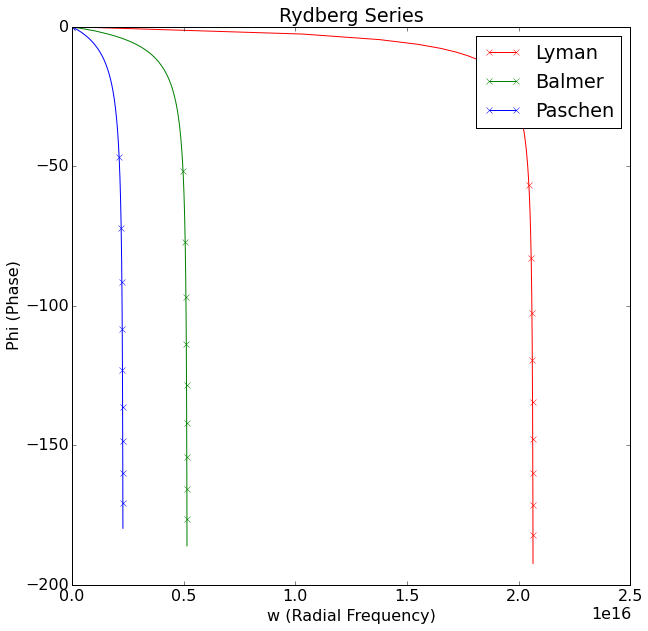

In [175]:
plt.title('Rydberg Series')
plt.xlabel('w (Radial Frequency)')
plt.ylabel('Phi (Phase)')
lymann = plt.plot(w(1, 1000), phi(1, 1000), color='red', label='Lyman', marker='x', markevery=100)
balmer = plt.plot(w(4, 1000), phi(4, 1000), color='green', label='Balmer', marker='x', markevery=100)
paschen = plt.plot(w(9, 1000), phi(9, 1000), color='blue', label='Paschen', marker='x', markevery=100)
plt.legend(loc='upper right')

In [66]:
def reflectance(s, upto):
    return np.real(np.exp((1j)*phi(s, upto)))
def impedance(s, upto):
    return (1+reflectance(s, upto))/(1-reflectance(s, upto))
def admittance(s, upto):
    return 1./impedance(s, upto)

In [60]:
def fn(n_):
    return constants.c*constants.Rydberg*(1.-1./pow(n_,2))
def dynamics(n=3.1):
    for i in range(10):
        n=fn(n)
        print n

In [62]:
dynamics(2)

2.46738147027e+15
3.28984196036e+15
3.28984196036e+15
3.28984196036e+15
3.28984196036e+15
3.28984196036e+15
3.28984196036e+15
3.28984196036e+15
3.28984196036e+15
3.28984196036e+15


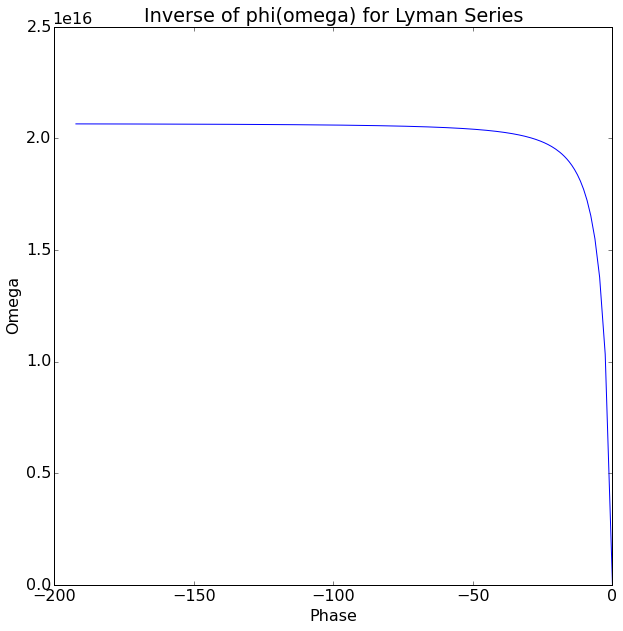

In [114]:
x=np.arange(1,10,.1)
plt.title("Inverse of phi(omega) for Lyman Series")
plt.xlabel("Phase")
plt.ylabel("Omega")
plt.plot(phi(1, 1000), w(1, 1000))

In [128]:
x = w(1, 1000)
Y = phi(1, 1000)

In [148]:
Y

array([  -0.        ,   -2.60258057,   -4.59961088,   -6.28318531,
         -7.76644415,   -9.10741265,  -10.34056046,  -11.48834645,
        -12.56637061,  -13.58599122,  -14.55578285,  -15.48240706,
        -16.37116149,  -17.22634141,  -18.05148675,  -18.84955592,
        -19.62305138,  -20.37411232,  -21.10458449,  -21.81607362,
        -22.50998697,  -23.18756608,  -23.84991286,  -24.49801062,
        -25.13274123,  -25.75489918,  -26.36520325,  -26.96430622,
        -27.55280309,  -28.13123795,  -28.70010993,  -29.2598782 ,
        -29.81096631,  -30.35376597,  -30.88864026,  -31.41592654,
        -31.93593885,  -32.44897018,  -32.95529436,  -33.45516776,
        -33.94883082,  -34.43650943,  -34.91841608,  -35.394751  ,
        -35.86570308,  -36.33145079,  -36.79216295,  -37.24799943,
        -37.69911184,  -38.14564407,  -38.58773287,  -39.02550829,
        -39.45909418,  -39.88860858,  -40.31416406,  -40.73586813,
        -41.15382349,  -41.56812837,  -41.9788768 ,  -42.38615

In [152]:
np.polyval(p, Y[0:200])

array([  7.41337096e+13,   1.00818328e+16,   1.38419564e+16,
         1.56430799e+16,   1.66474600e+16,   1.72792298e+16,
         1.77185811e+16,   1.80496650e+16,   1.83145073e+16,
         1.85352696e+16,   1.87242553e+16,   1.88886888e+16,
         1.90330986e+16,   1.91605446e+16,   1.92732634e+16,
         1.93730126e+16,   1.94612565e+16,   1.95392663e+16,
         1.96081736e+16,   1.96690007e+16,   1.97226768e+16,
         1.97700476e+16,   1.98118817e+16,   1.98488755e+16,
         1.98816572e+16,   1.99107912e+16,   1.99367816e+16,
         1.99600768e+16,   1.99810732e+16,   2.00001197e+16,
         2.00175213e+16,   2.00335435e+16,   2.00484156e+16,
         2.00623346e+16,   2.00754686e+16,   2.00879596e+16,
         2.00999267e+16,   2.01114689e+16,   2.01226673e+16,
         2.01335875e+16,   2.01442816e+16,   2.01547900e+16,
         2.01651433e+16,   2.01753634e+16,   2.01854652e+16,
         2.01954575e+16,   2.02053444e+16,   2.02151257e+16,
         2.02247982e+16,

/home/user/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


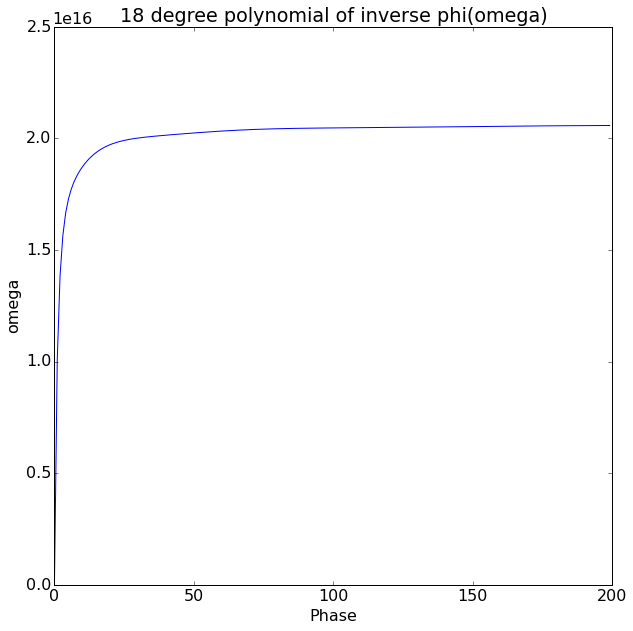

In [169]:
p = np.polyfit(Y, x, 18)
plt.title("18 degree polynomial of inverse phi(omega)")
plt.xlabel("Phase")
plt.ylabel("omega")
plt.plot(np.polyval(p, Y[0:200]))

In [131]:
from scipy.interpolate import interp1d

In [132]:
f = interp1d(Y, x, kind='cubic')

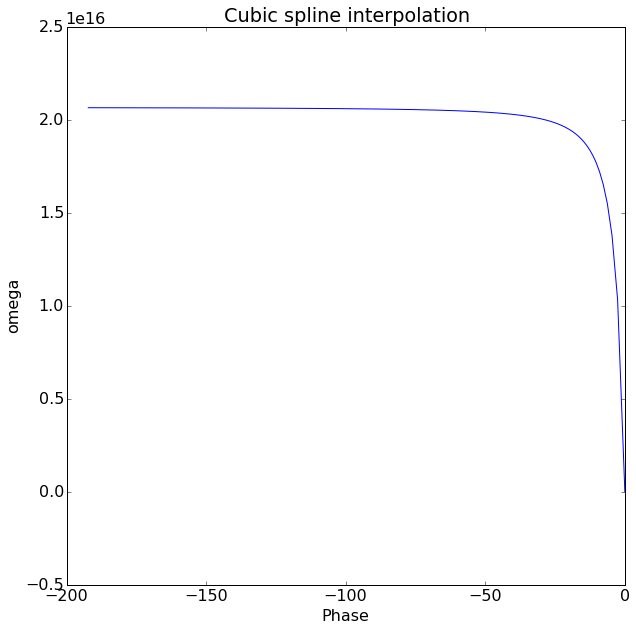

In [174]:
plt.title("Cubic spline interpolation")
plt.xlabel("Phase")
plt.ylabel("omega")
plt.plot(Y, f(Y))

In [50]:
from scipy import interpolate

In [51]:
tck = interpolate.splrep(x, Y, s=0)
yNew = interpolate.splev(x, tck, der=0)

In [59]:
np.polyfit(x, yNew, 10)

/home/user/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


array([  0.00000000e+000,  -1.20620427e-137,   1.62144765e-120,
        -9.48482784e-104,   3.15236736e-087,  -6.50843523e-071,
         8.54395589e-055,  -6.96090595e-039,   3.21606401e-023,
        -6.44691919e-008,   2.89660033e-006])